In [1]:
# Import module/s
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.backends.backend_pdf import PdfPages
from math import sqrt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


# Plot Style
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
# plt.rcParams['figure.facecolor'] = 'B4BCFF' #'#B4CEFF' # 'b4ffe5' '#FFE5B4' https://www.colorhexa.com/ffe5b4
sns.set_theme(style='darkgrid', palette='pastel', ) #Set3
SUBPLOT_FONTSIZE = 15
MAINPLOT_FONTSIZE = 20
SCATTERPOINT_SIZE = 20

# !!! ----  IMPORTANT ---- !!!!
# !pip install plotly
# !pip install lxml 

![separator1](https://i.imgur.com/ZUWYTii.png)
# Get Data and Perform Initial Analysis

In [2]:
# Import data
model_data = pd.read_csv('Admission_Predict.csv',header=0)


In [3]:
model_data.shape

(400, 9)

In [4]:
model_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
# Reformat column names. Change space to underscore. 
model_data.columns = model_data.columns.str.replace(' ', '_')
model_data

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [6]:
# Check info to have an idea if future data cleaning is needed
#  To get a view if you have numerical and categorical data
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No.         400 non-null    int64  
 1   GRE_Score          400 non-null    int64  
 2   TOEFL_Score        400 non-null    int64  
 3   University_Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR_               400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance_of_Admit_   400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


```{toggle}Here we are able to see that there are no null values.And that we only have all numerical values
``` 

In [7]:
model_data.isnull().sum()

Serial_No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR_                 0
CGPA                 0
Research             0
Chance_of_Admit_     0
dtype: int64

In [8]:
# Understand the type of data for each column
model_data.isna().sum()

Serial_No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR_                 0
CGPA                 0
Research             0
Chance_of_Admit_     0
dtype: int64

In [9]:
# Check frequency counts for each column to get an idea of the range of data for each
for eachSeries in model_data:
    print(f'--- Number of Uniqe values for {eachSeries} ---')
    num_unique = model_data[eachSeries].unique()
    print(len(num_unique))

--- Number of Uniqe values for Serial_No. ---
400
--- Number of Uniqe values for GRE_Score ---
49
--- Number of Uniqe values for TOEFL_Score ---
29
--- Number of Uniqe values for University_Rating ---
5
--- Number of Uniqe values for SOP ---
9
--- Number of Uniqe values for LOR_ ---
9
--- Number of Uniqe values for CGPA ---
168
--- Number of Uniqe values for Research ---
2
--- Number of Uniqe values for Chance_of_Admit_ ---
60


### Correlation Heat Map

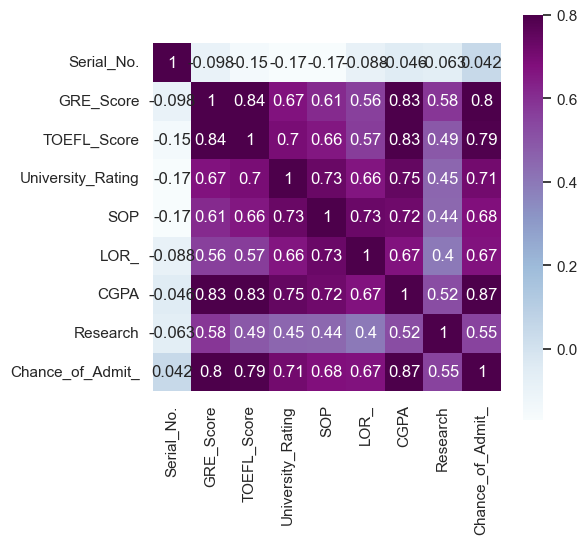

In [10]:
# Compute pairwise correlation of data and visualize
model_data_matrix = model_data.corr()
plt.figure(figsize = (5, 5))
sns.heatmap(model_data_matrix, vmax=.8, square=True, cmap="BuPu",annot=True);
plt.show()


From above amtrix we see CGPA, GRE and TOEFL have top3 positive correlation with Chance of Admit
```
???? But in final model CGPA not included.
Further analysis to prove CGPA shouldnt be in the final model????
```

![separator1](https://i.imgur.com/ZUWYTii.png)

# Initial Exploratory Data Visualization

<!-- https://www.codecademy.com/article/eda-data-visualization -->


In [11]:
# model_data_columns = model_data.columns
# # type(model_data.Research)
# type(model_data['Research'])
y = model_data['Chance_of_Admit_']
model_data_2 = model_data.drop(columns=['Serial_No.','Chance_of_Admit_'])
model_data_2

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


<!-- Univariate Analysis -->
### Histogram to check distribution



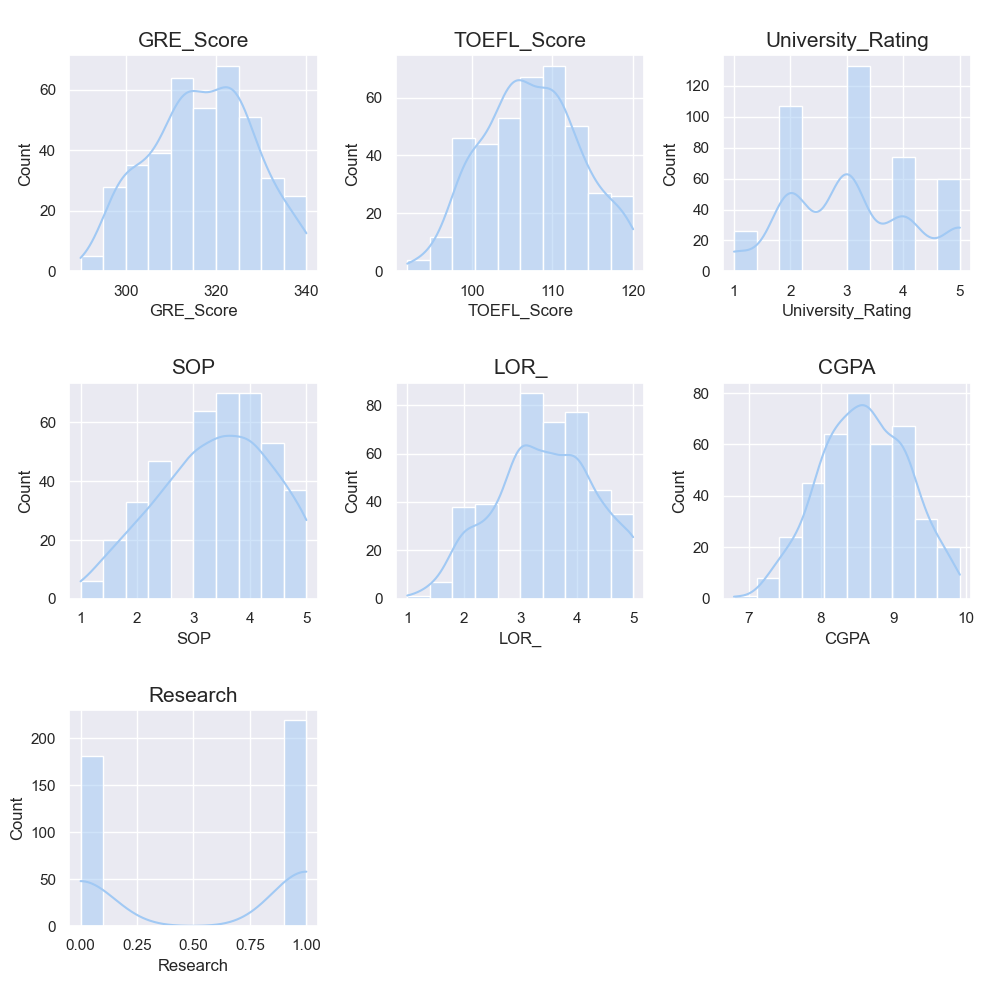

In [12]:
plt.figure(figsize = (10, 10))
plotnumber = 1

for eachCol in model_data_2:
    x = model_data_2[eachCol]
    # if x.name != hue_data.name:
    ax = plt.subplot(3, 3, plotnumber)
    sns.histplot(x = x, data = y, ax = ax, bins = 10, kde=True)
    plt.title(f"\n{model_data_2[eachCol].name}", fontsize = SUBPLOT_FONTSIZE)
    plotnumber += 1
plt.tight_layout()
plt.show()

<!-- Univariate Analysis -->
### Boxplot


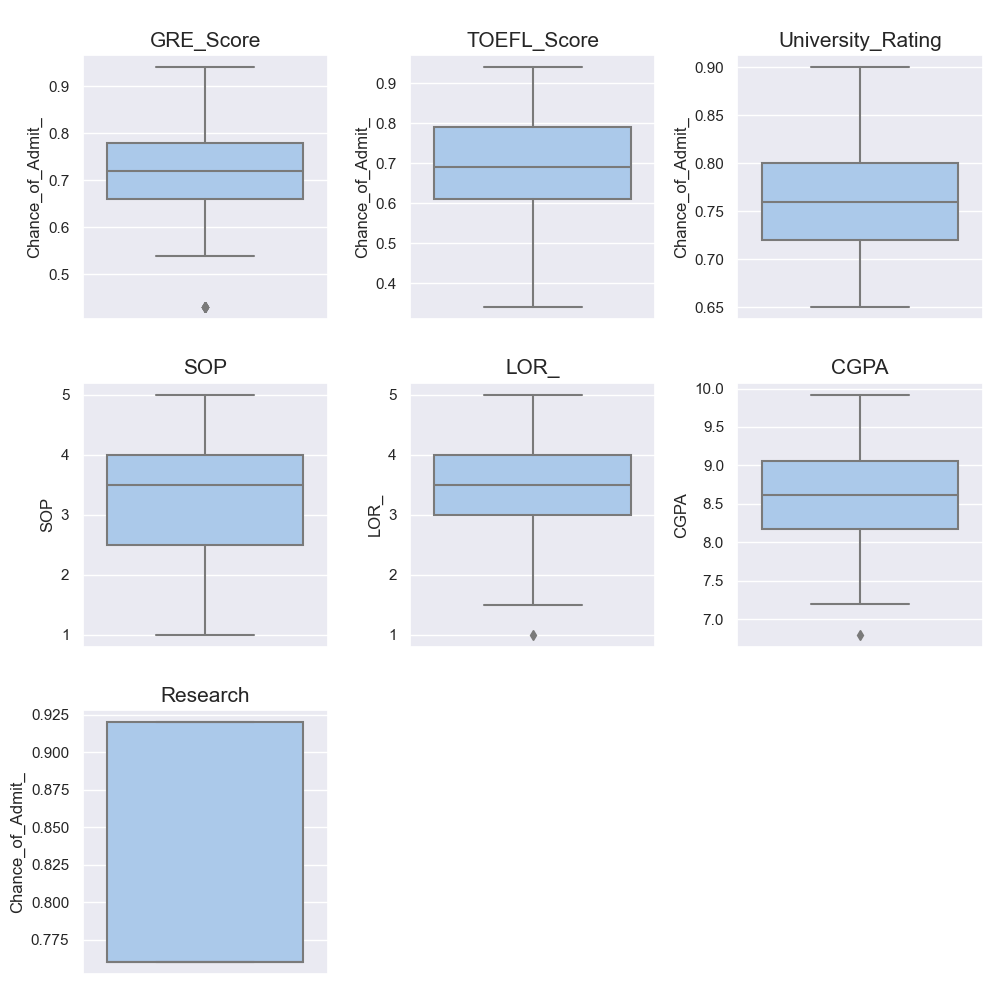

In [13]:

plt.figure(figsize = (10, 10))
plotnumber = 1

for eachCol in model_data_2:
    x = model_data_2[eachCol]
    # if x.name != hue_data.name:
    ax = plt.subplot(3, 3, plotnumber)
    sns.boxplot(y = x, data = y, ax = ax)
    plt.title(f"\n{model_data_2[eachCol].name}", fontsize = SUBPLOT_FONTSIZE)
    plotnumber += 1
plt.tight_layout()
plt.show()


```
Based on this how do we preprocess data to remove outliers?
```

<!-- Multivariate Analysis -->
### Scatterplot to check relationship and pattern with specific discrete data


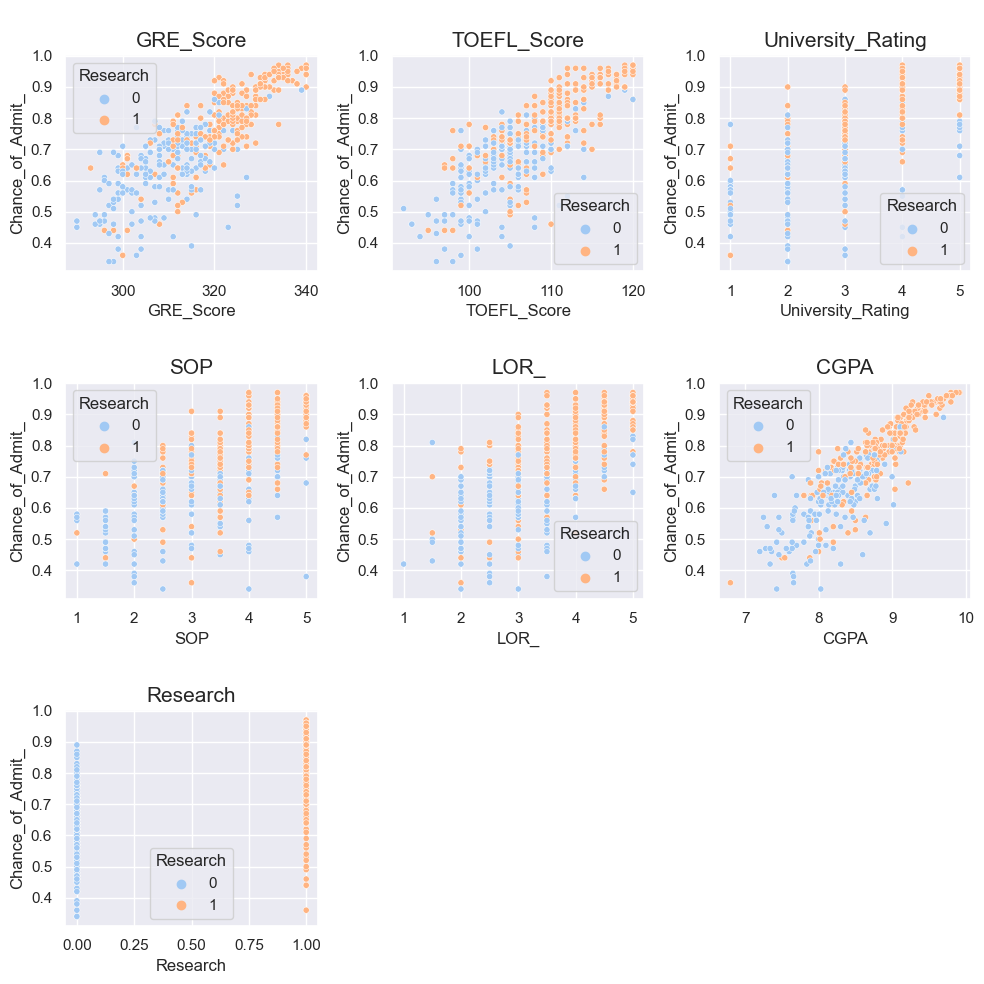

In [14]:
plt.figure(figsize = (10, 10))
plotnumber = 1
# Choose relevant data here????
# hue_data = model_data_2['University_Rating']
# hue_data = model_data_2['SOP']
# hue_data = model_data_2['LOR_']
hue_data = model_data_2['Research']

for eachCol in model_data_2:
    x = model_data_2[eachCol]
    # if x.name != hue_data.name:
    ax = plt.subplot(3, 3, plotnumber)
    sns.scatterplot(x = x, y = y, hue = hue_data, s = SCATTERPOINT_SIZE);
    plt.title(f"\n{model_data_2[eachCol].name}", fontsize = SUBPLOT_FONTSIZE)
    plotnumber += 1
plt.tight_layout()
plt.show()

![separator1](https://i.imgur.com/ZUWYTii.png)

# Data Modelling

In [15]:
# Final Model: GRE Score, TOEFL Score, LOR, CGPA
y_var = 'Chance_of_Admit_'
x_vars = [
'GRE_Score',
'TOEFL_Score',
# 'LN_GRE',
# 'LN_TOEFL',
# 'University_Rating',
# 'SOP',
'LOR_',
'CGPA'
# ,'Research'
]

# Get the values of y (dependent variable)
y_values = model_data[y_var]

# Get the values of x (independent variables)
x_values = model_data[x_vars]

# Add constant to independent/predictor variables
x_values = sm.add_constant(x_values)

x_values

,const,GRE_Score,TOEFL_Score,LOR_,CGPA
0,1.0,337,118,4.5,9.65
1,1.0,324,107,4.5,8.87
2,1.0,316,104,3.5,8.00
3,1.0,322,110,2.5,8.67
4,1.0,314,103,3.0,8.21
...,...,...,...,...,...
395,1.0,324,110,3.5,9.04
396,1.0,325,107,3.5,9.11
397,1.0,330,116,4.5,9.45
398,1.0,312,103,4.0,8.78


In [16]:
# Get the values of y (dependent variable)
y_values = model_data[y_var]
y_values


0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance_of_Admit_, Length: 400, dtype: float64

In [17]:
# Get the values of x (independent variables)
x_values = model_data[x_vars]
x_values

,GRE_Score,TOEFL_Score,LOR_,CGPA
0,337,118,4.5,9.65
1,324,107,4.5,8.87
2,316,104,3.5,8.00
3,322,110,2.5,8.67
4,314,103,3.0,8.21
...,...,...,...,...
395,324,110,3.5,9.04
396,325,107,3.5,9.11
397,330,116,4.5,9.45
398,312,103,4.0,8.78


In [18]:
# Add constant to independent/predictor variables
x_values = sm.add_constant(x_values)
x_values

,const,GRE_Score,TOEFL_Score,LOR_,CGPA
0,1.0,337,118,4.5,9.65
1,1.0,324,107,4.5,8.87
2,1.0,316,104,3.5,8.00
3,1.0,322,110,2.5,8.67
4,1.0,314,103,3.0,8.21
...,...,...,...,...,...
395,1.0,324,110,3.5,9.04
396,1.0,325,107,3.5,9.11
397,1.0,330,116,4.5,9.45
398,1.0,312,103,4.0,8.78


### Split to TRAIN and TEST Datasets

In [19]:
# Split the data into training (70%) and testing (30%) datasets
x_train, x_test, y_train, y_test = train_test_split(x_values,y_values,test_size=0.3,random_state=1234)


### Fit Multiple Linear Regression Model

In [20]:

model = sm.OLS(y_train, x_train).fit()

# Predict the values of y in both the training and testing datasets
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Get the value of m (slope of regression line) in y = mx + b
m_value = model.params.loc[x_vars]

MODEL_SUMMARY = model.summary()
MODEL_SUMMARY



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance_of_Admit_   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     286.9
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           8.18e-97
Time:                        15:03:32   Log-Likelihood:                 380.72
No. Observations:                 280   AIC:                            -751.4
Df Residuals:                     275   BIC:                            -733.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.4693      0.126    -11.653      0.000      -1.718      -1.221
GRE_Score       0.0021      0.001      3.140      0.002       0.001       0.003
TOEFL_Score     0.0034      0.001      2.840      0.005       0.001       0.006
LOR_            0.0236      0.006      4.123      0.000       0.012       0.035
CGPA            0.1248      0.014      9.228      0.000       0.098       0.151
==============================================================================
Omnibus:                       60.232   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.188
Skew:                          -1.098   Prob(JB):                     7.97e-27
Kurtosis:                       5.341   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

![separator1](https://i.imgur.com/ZUWYTii.png)

# Evaluate Model
<!-- Get model summary as dataframe -->
 <!-- https://stackoverflow.com/questions/51734180/converting-statsmodels-summary-object-to-pandas-dataframe -->


In [21]:
# Check how many tables
len(MODEL_SUMMARY.tables)

3

In [22]:
# First Table
results_as_html = MODEL_SUMMARY.tables[0].as_html()
ols_result_1 = pd.read_html(results_as_html, header=None, index_col=None)[0]
ols_result_1


,0,1,2,3
0,Dep. Variable:,Chance_of_Admit_,R-squared:,8.070000e-01
1,Model:,OLS,Adj. R-squared:,8.040000e-01
2,Method:,Least Squares,F-statistic:,2.869000e+02
3,Date:,"Wed, 15 Feb 2023",Prob (F-statistic):,8.180000e-97
4,Time:,15:03:32,Log-Likelihood:,3.807200e+02
5,No. Observations:,280,AIC:,-7.514000e+02
6,Df Residuals:,275,BIC:,-7.333000e+02
7,Df Model:,4,NaN,NaN
8,Covariance Type:,nonrobust,NaN,NaN


**Interpretation:**

**R-squared:	0.807**  -> The model can explain 80.7% of the variation in the values of Chance_of_Admit.

**Prob (F-statistic):	8.18e-97**   -> significant


In [23]:
# Second table 
results_as_html = MODEL_SUMMARY.tables[1].as_html()
ols_result_2 = pd.read_html(results_as_html, header=0, index_col=None)[0]
ols_result_2


,Unnamed: 0,coef,std err,t,P>|t|,[0.025,0.975]
0,const,-1.4693,0.126,-11.653,0.000,-1.718,-1.221
1,GRE_Score,0.0021,0.001,3.140,0.002,0.001,0.003
2,TOEFL_Score,0.0034,0.001,2.840,0.005,0.001,0.006
3,LOR_,0.0236,0.006,4.123,0.000,0.012,0.035
4,CGPA,0.1248,0.014,9.228,0.000,0.098,0.151


**Interpretation:**

p-value for the t-tests
<br>&emsp;const = 0.000 
<br>&emsp;GRE_Score = 0.002
<br>&emsp;TOEFL_Score = 0.005
<br>&emsp;LOR_ = 0.000
<br>&emsp;CGPA = 0.000

All p-values are below 0.05. There is a significant relationship between the predictors and the dependent variable.

In [24]:
# Table 3 
results_as_html = MODEL_SUMMARY.tables[2].as_html()
ols_result_3 = pd.read_html(results_as_html, header=None, index_col=None)[0]
ols_result_3

,0,1,2,3
0,Omnibus:,60.232,Durbin-Watson:,2.036000e+00
1,Prob(Omnibus):,0.000,Jarque-Bera (JB):,1.201880e+02
2,Skew:,-1.098,Prob(JB):,7.970000e-27
3,Kurtosis:,5.341,Cond. No.,1.130000e+04


### Test for multicollinearity
&emsp;VIF starts at 1 and has no upper limit
<br>&emsp;VIF = 1, no correlation between the independent variable and the other variables
<br>&emsp;VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF Factors. For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_values.values, i) for i in range(x_values.shape[1])]
vif["Predictors"] = x_values.columns

# Inspect VIF Factors. VIF should be <10
vif.round(1)

,VIF Factor,Predictors
0,1077.3,const
1,4.2,GRE_Score
2,4.1,TOEFL_Score
3,1.8,LOR_
4,4.8,CGPA


**Interpretation:**

All predictors (x's) have VIF < 10. No multicollinearity issues.

### Test for Homoscedasticity 

In [26]:
# Perform White's test. p-value should be >= 0.05
from statsmodels.stats.diagnostic import het_white
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 21.571992734494398, 'Test Statistic p-value': 0.08784708876377695, 'F-Statistic': 1.5800416125640413, 'F-Test p-value': 0.08452839082423688}


**Interpretation:**

The p-value (0.0878) is not less than 0.05. There is no sufficient evidence to say that heteroskedasticity is present in the data.

### Assumption of Independent Errors

In [27]:
# Durbin-Watson test. For this test, a value of 2, or close to it, is ideal.
print(model.resid)
sm.stats.stattools.durbin_watson(model.resid)     

217    0.031221
349    0.005329
188    0.052519
267    0.064531
222   -0.036459
         ...   
204    0.007276
53     0.048519
294   -0.022347
211   -0.018276
303   -0.001932
Length: 280, dtype: float64


2.036016702634327

**Interpretation:**

Value (2.0360) is close to 2. The residual error terms are independent of each other.

### Error Evaluation Metrics [TRAIN dataset]

In [28]:
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print('rmse_train (Train): ',rmse_train*100)
print('MAPE (Train): ',mape_train*100)


rmse_train (Train):  6.21230052316327
MAPE (Train):  7.184923961652341


### Error Evaluation Metrics [TEST dataset]

In [29]:
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print('rmse_test (Test): ',rmse_test*100)
print('MAPE (Test): ',mape_test*100)

rmse_test (Test):  6.842171459283393
MAPE (Test):  7.834492108967156


**Interpretation:**

Mean Absolute Percentage Errors (MAPE) are low (below 10%).